<a href="https://colab.research.google.com/github/OktovanAgung/Affine-Cipher/blob/main/ANALISIS_SENTIMEN_TAPERA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INSTALL LIBRARY

In [1]:
!pip install Sastrawi tweet-preprocessor textblob wordcloud nltk

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.2 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#CLEANING DATA

In [3]:
df = pd.read_csv("DATASET_TAPERA.csv")
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1797255604307988898,02/06/2024,9161,Tapera cuma 3% ga akan membuatmu miskin #eh ht...,1797255604307988898,https://pbs.twimg.com/media/GPEico6aEAEIUsg.jpg,NaN,in,"Data Center, Singapore",99,92,3670,https://x.com/ibnux/status/1797255604307988898,20653807,ibnux
1,1797417985759739963,03/06/2024,685,Masih kesal dengan tapera ini https://t.co/c3u...,1797417985759739963,https://pbs.twimg.com/media/GPG2IaMbYAAmLvG.jpg,NaN,in,Indonesia,2,6,98,https://x.com/tanyakanrl/status/17974179857597...,1331650559518990336,tanyakanrl
2,1796884788131094794,01/06/2024,2928,PEKERJA KOMPAK TOLAK TAPERA. NETIZEN: UJUNGNYA...,1796884788131094794,https://pbs.twimg.com/media/GO_RMTRbAAEC7mL.jpg,NaN,in,NaN,17,28,816,https://x.com/herculep638/status/1796884788131...,1722014606712094720,herculep638
3,1797665332565574110,03/06/2024,1929,Kebetulan Tapera yang jenaka https://t.co/c4dU...,1797665332565574110,https://pbs.twimg.com/media/GPKXEZgbEAERc8B.jpg,NaN,in,Indonesia,88,30,689,https://x.com/gegerriy/status/1797665332565574110,29961293,gegerriy
4,1795463085286887931,28/05/2024,21258,Bayangin jadi warga Indonesia dalam satu mingg...,1795463085286887931,https://pbs.twimg.com/media/GOrEJxaaEAADZ1O.jpg,NaN,in,"Yogyakarta, Indonesia",1013,507,10386,https://x.com/mardiasih/status/179546308528688...,164627338,mardiasih
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598,1805939394664120356,26/06/2024,24,@joseph_kalimbwe Ask Mukoma George Charamba!,1805944305204294069,NaN,joseph_kalimbwe,in,"Clinton, NY",0,1,0,https://x.com/TaperaEmmanuel/status/1805944305...,2945547461,TaperaEmmanuel
1599,1805061332754125294,24/06/2024,30,@Dee_Rose82 Tapera yaa nda tau kok tanya saya,1805217196026810673,NaN,Dee_Rose82,in,NaN,0,1,0,https://x.com/PelatihT1dur/status/180521719602...,1400896654820085760,PelatihT1dur
1600,1806243749107769443,27/06/2024,2,@dhonzamusoro007 @mchihoroyahooco @GeorgeChara...,1806258201764975065,NaN,dhonzamusoro007,in,"Clinton, NY",0,1,0,https://x.com/TaperaEmmanuel/status/1806258201...,2945547461,TaperaEmmanuel
1601,1806159974508417120,28/06/2024,2,@ardisatriawan Ini hanya kemungkinan saja. Men...,1806728791244542016,NaN,ardisatriawan,in,Buitenzorg,0,0,2,https://x.com/fasknd/status/1806728791244542016,132761813,fasknd


In [4]:
df.shape

(1603, 15)

In [5]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

conversation_id_str           0
created_at                    0
favorite_count                0
full_text                     0
id_str                        0
image_url                   792
in_reply_to_screen_name    1356
lang                          0
location                    501
quote_count                   0
reply_count                   0
retweet_count                 0
tweet_url                     0
user_id_str                   0
username                      0
dtype: int64

In [8]:
# Mengambil atribut yang diperlukan
df = df[['full_text', 'username', 'created_at']]

In [15]:
# Menghapus duplicate
df = df.drop_duplicates(subset=['full_text'])
df = df.dropna()

In [10]:
# Menghapus simbol
def clean_twitter_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'[^A-Za-z0-9 ]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [11]:
# Mengubah teks menjadi huruf kecil
df['full_text'] = df['full_text'].str.lower()

In [19]:
# Menyimpan hasil cleaning data ke file CSV baru
df.to_csv('DATASET_TAPERA_cleaned.csv', index=False)

#HASIL CLEANING DATA

In [20]:
df = pd.read_csv("DATASET_TAPERA_cleaned.csv")
df.head()

,full_text,username,created_at
0,tapera cuma 3 ga akan membuatmu miskin,ibnux,02/06/2024
1,masih kesal dengan tapera ini,tanyakanrl,03/06/2024
2,pekerja kompak tolak tapera netizen ujungnya d...,herculep638,01/06/2024
3,kebetulan tapera yang jenaka,gegerriy,03/06/2024
4,bayangin jadi warga indonesia dalam satu mingg...,mardiasih,28/05/2024


#PREPROCESSING DATA

In [21]:
df = pd.read_csv("DATASET_TAPERA_cleaned.csv")
df

,full_text,username,created_at
0,tapera cuma 3 ga akan membuatmu miskin,ibnux,02/06/2024
1,masih kesal dengan tapera ini,tanyakanrl,03/06/2024
2,pekerja kompak tolak tapera netizen ujungnya d...,herculep638,01/06/2024
3,kebetulan tapera yang jenaka,gegerriy,03/06/2024
4,bayangin jadi warga indonesia dalam satu mingg...,mardiasih,28/05/2024
...,...,...,...
1548,ask mukoma george charamba,TaperaEmmanuel,26/06/2024
1549,tapera yaa nda tau kok tanya saya,PelatihT1dur,24/06/2024
1550,imi akoma machembera wani asi pane achiri kuku...,TaperaEmmanuel,27/06/2024
1551,ini hanya kemungkinan saja menurut ku ini game...,fasknd,28/06/2024


In [22]:
# Normalisasi
norm = {' yg ': ' yang ', ' nggak ': ' tidak ', ' gak ': ' tidak ', ' bangetdari ': ' banget dari ', ' vibes ': ' suasana ', ' mantab ': ' keren ', ' benarsetuju ': ' benar setuju ', ' stylish ': ' bergaya ', ' ngapusi ': ' bohong ', ' gede ': ' besar ', ' all in ': ' yakin ', ' blokkkkk ': ' goblok ', ' blokkkk ': ' goblok ', ' blokkk ': ' goblok ', ' blokk ': ' goblok ', ' blok ': ' goblok ', ' ri ': ' republik indonesia', ' kem3nangan ': ' kemenangan ', ' sat set ': ' cepat ', ' ala ': ' dari ', ' best ': ' terbaik ', ' mantab ': ' mantap ', ' bgttt ': ' banget ', ' gue ': ' saya ', ' hrs ': ' harus ', ' fixed ': ' tetap ', ' blom ': ' belum ', ' aing ': ' aku ', ' tehnologi ': ' teknologi ', ' jd ': ' jadi ', ' dg ': ' dengan ', ' kudu ': ' harus ', ' jk ': ' jika ', ' problem ': ' masalah ', ' iru ': ' itu ', ' duit ': ' uang ', ' duid ': ' uang ', ' bgsd ': ' bangsat ',' jt ': ' juta ', ' stop ': ' berhenti ', ' ngeri ': ' seram ', ' turu ': ' tidur ', ' early ': ' awal ', ' pertamna ': ' pertamina ', ' mnurut ': ' menurut ', ' trus ': ' terus ', ' msh ': ' masih ', ' simple ': ' mudah ', ' worth ': ' layak ', 'problem ': ' masalah ', ' hny ': ' hanya ', ' dn ': ' dan ', ' jln ': ' jalan ',' bgt ': ' banget ',' ga ': ' tidak ', ' text ': ' teks ', ' end ': ' selesai ', ' kelen ': ' kalian ', ' jd ': ' jadi ', ' tuk ': ' untuk ', ' kk ': ' kakak ',' dgn ':' dengan ',' skrg ': ' sekarang '}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df


,full_text,username,created_at
0,tapera cuma 3 tidak akan membuatmu miskin,ibnux,02/06/2024
1,masih kesal dengan tapera ini,tanyakanrl,03/06/2024
2,pekerja kompak tolak tapera netizen ujungnya d...,herculep638,01/06/2024
3,kebetulan tapera yang jenaka,gegerriy,03/06/2024
4,bayangin jadi warga indonesia dalam satu mingg...,mardiasih,28/05/2024
...,...,...,...
1548,ask mukoma george charamba,TaperaEmmanuel,26/06/2024
1549,tapera yaa nda tau kok tanya saya,PelatihT1dur,24/06/2024
1550,imi akoma machembera wani asi pane achiri kuku...,TaperaEmmanuel,27/06/2024
1551,ini hanya kemungkinan saja menurut ku ini game...,fasknd,28/06/2024


In [23]:
# Stopwords
more_stop_words = ["dan", "di", "ke", "atau", "juga", "sebagai", "pada", "dari", "untuk", "ini", "itu", "ada", "dengan", "yang", "jika", "saja", "lagi", "belum", "ataupun"]


stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df

,full_text,username,created_at
0,tapera cuma 3 akan membuatmu miskin,ibnux,02/06/2024
1,kesal tapera,tanyakanrl,03/06/2024
2,pekerja kompak tolak tapera netizen ujungnya d...,herculep638,01/06/2024
3,kebetulan tapera jenaka,gegerriy,03/06/2024
4,bayangin jadi warga indonesia satu minggu awas...,mardiasih,28/05/2024
...,...,...,...
1548,ask mukoma george charamba,TaperaEmmanuel,26/06/2024
1549,tapera yaa nda tau kok tanya,PelatihT1dur,24/06/2024
1550,imi akoma machembera wani asi pane achiri kuku...,TaperaEmmanuel,27/06/2024
1551,hanya kemungkinan menurut ku game ordal hacker...,fasknd,28/06/2024


In [24]:
# Tokenize
tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

0              [tapera, cuma, 3, akan, membuatmu, miskin]
1                                         [kesal, tapera]
2       [pekerja, kompak, tolak, tapera, netizen, ujun...
3                             [kebetulan, tapera, jenaka]
4       [bayangin, jadi, warga, indonesia, satu, mingg...
                              ...                        
1548                      [ask, mukoma, george, charamba]
1549                  [tapera, yaa, nda, tau, kok, tanya]
1550    [imi, akoma, machembera, wani, asi, pane, achi...
1551    [hanya, kemungkinan, menurut, ku, game, ordal,...
1552    [negara, tugas, nya, bantu, pajakin, uang, rak...
Name: full_text, Length: 1553, dtype: object

In [25]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tapera cuma 3 akan buat miskin
kesal tapera
kerja kompak tolak tapera netizen ujung korupsi taspen amp jiwasraya
betul tapera jenaka
bayangin jadi warga indonesia satu minggu awas sama isu ukt isu student loan isu ruu polri isu ruu siar isu gaji pribadi mau potong langsung sama negara buat tapera tonton fakta fakta ikut
misal gaji 6jt buat tapera 3 nya 180k misal tabung lama 10 tahun aja cuma dapet 216 juta inflasi 10 tahun depan nilai nya turun emang beli rumah pake uang 216 juta buat dp lah ngumpulin dp nya aja 10 tahun inimah akal2an perintah
pas baca soal tapera tibatiba langsung keinget beberapa kali uanguang dititipin negara malah raib korupsi kasus korupsi jiwasraya bikin negara rugi rp16 807 triliun kasus korupsi asabri bikin negara rugi rp22 78 triliun narasi daily
rumah hasil tapera lama 20 tahun
the only tapera diridhoi allah swt
room tour rumah tapera
orang kantor idiiih jual sapi desa tukang sapi idiiih potong tapera tukang sapi 1 0 orang kantor
keren rohingya tampung gaza

In [27]:
# Menyimpan hasil preprocessing ke file CSV baru
df.to_csv('DATA_TAPERA_preprocessed.csv', index=False)

#LABELING

In [28]:
data = pd.read_csv("DATA_TAPERA_preprocessed.csv", index_col=0)
data

,username,created_at
full_text,,
tapera cuma 3 akan membuatmu miskin,ibnux,02/06/2024
kesal tapera,tanyakanrl,03/06/2024
pekerja kompak tolak tapera netizen ujungnya dikorupsi taspen amp jiwasraya,herculep638,01/06/2024
kebetulan tapera jenaka,gegerriy,03/06/2024
bayangin jadi warga indonesia satu minggu awas sama isu ukt isu student loan isu ruu polri isu ruu penyiaran isu gaji pribadi mau dipotong langsung sama negara buat tapera menonton fakta fakta berikut,mardiasih,28/05/2024
...,...,...
ask mukoma george charamba,TaperaEmmanuel,26/06/2024
tapera yaa nda tau kok tanya,PelatihT1dur,24/06/2024
imi akoma machembera wani asi pane achiri kukunyeperai kuti muchiri pwere muri mumagudza matochembera zvekudaro thats why you forgetting your other handuru on x,TaperaEmmanuel,27/06/2024


In [40]:
# Membaca dataset yang telah dipreproses dari file CSV
data = pd.read_csv('DATA_TAPERA_preprocessed.csv')

data_tweet = list(data['full_text'])
polaritas = 0

status = []
total_positif = total_negatif = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    else:
        total_negatif += 1
        status.append('Negatif')

    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 36
Negatif = 1517

Total Data : 1553


In [41]:
data['klasifikasi'] = status
data

,full_text,username,created_at,klasifikasi
0,tapera cuma 3 akan membuatmu miskin,ibnux,02/06/2024,Negatif
1,kesal tapera,tanyakanrl,03/06/2024,Negatif
2,pekerja kompak tolak tapera netizen ujungnya d...,herculep638,01/06/2024,Negatif
3,kebetulan tapera jenaka,gegerriy,03/06/2024,Negatif
4,bayangin jadi warga indonesia satu minggu awas...,mardiasih,28/05/2024,Negatif
...,...,...,...,...
1548,ask mukoma george charamba,TaperaEmmanuel,26/06/2024,Negatif
1549,tapera yaa nda tau kok tanya,PelatihT1dur,24/06/2024,Negatif
1550,imi akoma machembera wani asi pane achiri kuku...,TaperaEmmanuel,27/06/2024,Negatif
1551,hanya kemungkinan menurut ku game ordal hacker...,fasknd,28/06/2024,Negatif


In [42]:
# Menyimpan hasil labeling ke file CSV baru
data.to_csv('DATA_TAPERA_labeled.csv', index=False)

#Visualisasi

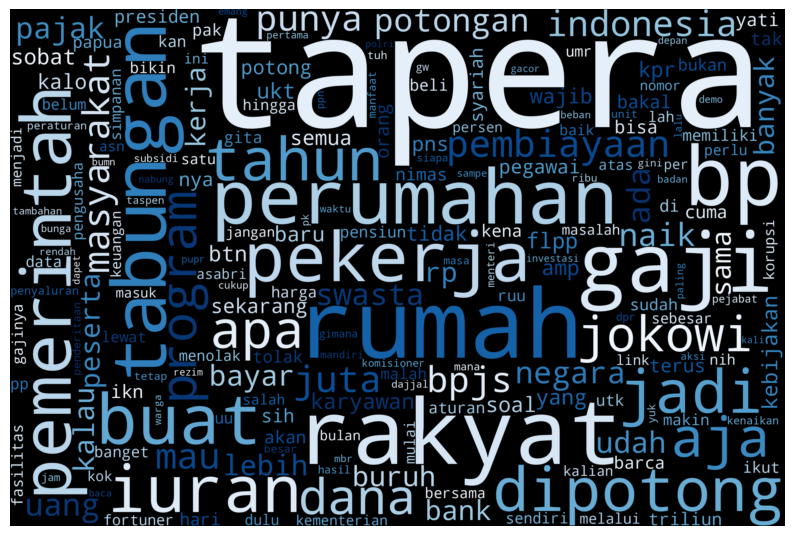

In [43]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


all_words = ' '.join((tweets for tweets in data['full_text']))

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color="black",
                      colormap='Blues_r',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


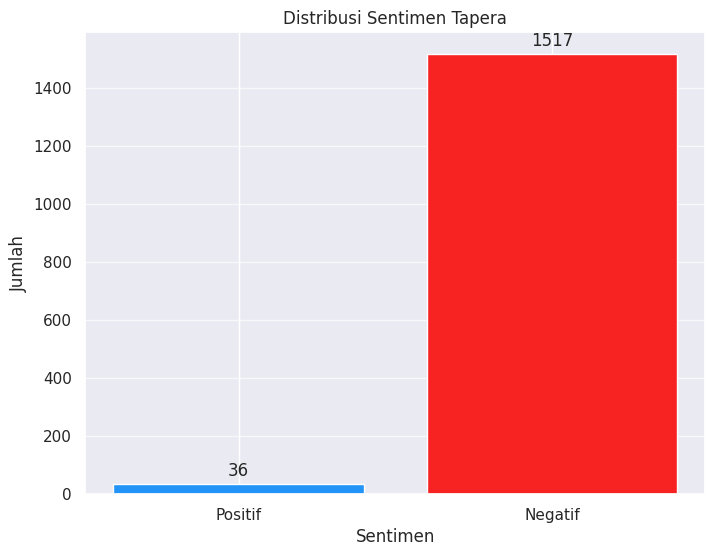

In [44]:
#Visualisasi diagram
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

# Labels and counts for the sentiments
labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

# Call the function to show the bar chart
show_bar_chart(labels, counts, "Distribusi Sentimen Tapera")

#NBC

In [45]:
data

,full_text,username,created_at,klasifikasi
0,tapera cuma 3 akan membuatmu miskin,ibnux,02/06/2024,Negatif
1,kesal tapera,tanyakanrl,03/06/2024,Negatif
2,pekerja kompak tolak tapera netizen ujungnya d...,herculep638,01/06/2024,Negatif
3,kebetulan tapera jenaka,gegerriy,03/06/2024,Negatif
4,bayangin jadi warga indonesia satu minggu awas...,mardiasih,28/05/2024,Negatif
...,...,...,...,...
1548,ask mukoma george charamba,TaperaEmmanuel,26/06/2024,Negatif
1549,tapera yaa nda tau kok tanya,PelatihT1dur,24/06/2024,Negatif
1550,imi akoma machembera wani asi pane achiri kuku...,TaperaEmmanuel,27/06/2024,Negatif
1551,hanya kemungkinan menurut ku game ordal hacker...,fasknd,28/06/2024,Negatif


#NBC

In [46]:

# Membaca dataset yang telah dipreproses dari file CSV
data = pd.read_csv('DATA_TAPERA_labeled.csv')

# Mengambil atribut yang diperlukan
X = data['full_text']
y = data['klasifikasi']


In [47]:
from sklearn.model_selection import train_test_split

# Memisahkan dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Mengubah teks menjadi fitur numerik menggunakan TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [50]:
from sklearn.naive_bayes import MultinomialNB

# Melatih model Naive Bayes dengan data pelatihan
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [51]:
from sklearn.metrics import accuracy_score, classification_report

# Memprediksi sentimen dengan data pengujian
y_pred = model.predict(X_test_tfidf)

# Mengukur kinerja model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Akurasi: {accuracy}')
print('Laporan Klasifikasi:')
print(report)


Akurasi: 0.9710610932475884
Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.97      1.00      0.99       302
     Positif       0.00      0.00      0.00         9

    accuracy                           0.97       311
   macro avg       0.49      0.50      0.49       311
weighted avg       0.94      0.97      0.96       311



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[3 1]
 [2 4]]


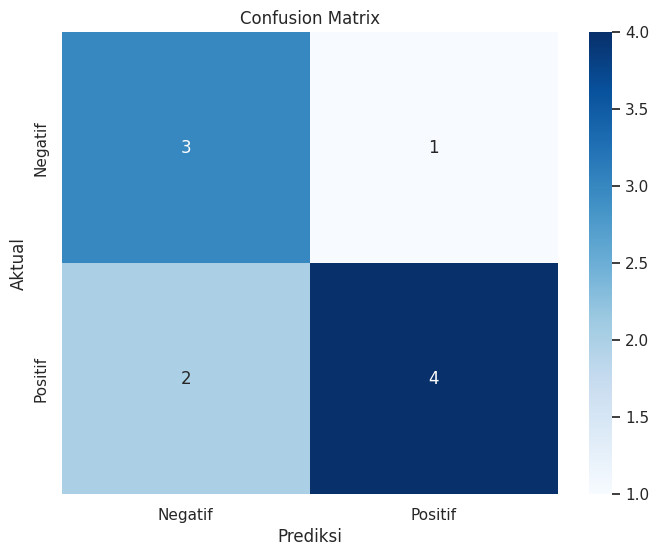


Metrik Evaluasi:
Akurasi: 0.70
Precision: 0.80
Recall: 0.67
F1-score: 0.73


In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh prediksi dan label yang sebenarnya
y_true = [1, 0, 1, 1, 0, 1, 0, 1, 1, 0]  # Contoh label sebenarnya
y_pred = [1, 0, 1, 1, 0, 0, 1, 1, 0, 0]  # Contoh prediksi model

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualisasi Confusion Matrix sebagai Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# Metrik Evaluasi lainnya
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("\nMetrik Evaluasi:")
print(f"Akurasi: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
